In [1]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def split_dataset(dataset, train_percentage, feature_headers, target_header):

	train_x, test_x,train_y,test_y = train_test_split(dataset[feature_headers],dataset[target_header],train_size=train_percentage)
	return train_x, test_x,train_y,test_y


def random_forest_classifier(features, target):
	clf = RandomForestClassifier()
	clf.fit(features, target)
	return clf

In [2]:
def Prediction_8month(trained_model,land):
	test = pd.read_csv('8month_test.csv', encoding='euc-kr')
	test = test.set_index("Date")
    
	landuse = [land for i in range(31)]
	test['LandUse'] = landuse

	prediction = trained_model.predict(test)
	test['Prediction'] = prediction
    
	return test
    

In [3]:
dataset = pd.read_csv('result.csv',encoding='euc-kr')

column_list = (dataset.columns.values)
train_x,test_x,train_y,test_y = split_dataset(dataset,0.9,column_list[2:9],column_list[-1])

trained_model = random_forest_classifier(train_x,train_y)



c:\python35\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
test = Prediction_8month(trained_model, 1)

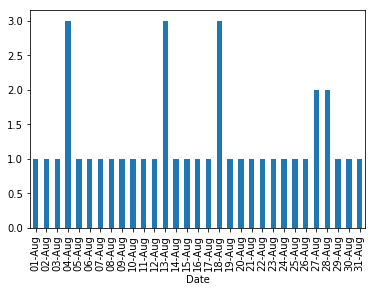

In [5]:
%matplotlib inline
test['Prediction'].plot(kind="bar")

In [6]:
test = Prediction_8month(trained_model, 2)

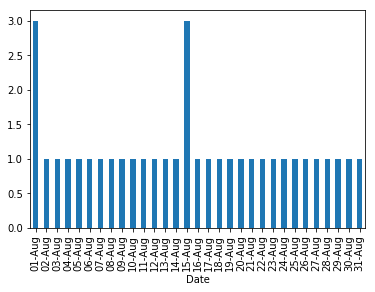

In [7]:
test['Prediction'].plot(kind="bar")

In [8]:
test = Prediction_8month(trained_model, 3)

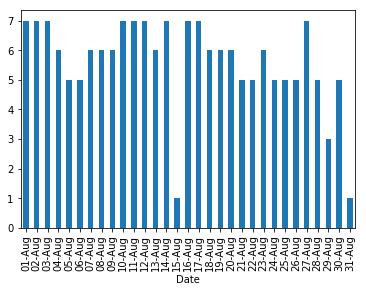

In [9]:
test['Prediction'].plot(kind="bar")